### TELCOM CUSTOMER CHURN PREDICTION 🔎

Customer churn, also known as customer attrition, refers to the loss of customers or subscribers over a specific period. It's essentially when customers stop doing business with a company. Businesses often measure this using the churn rate, which is the percentage of customers who leave within a given timeframe. 

In the context of a telecommunications company, customer churn can be particularly significant due to the competitive nature of the industry. High churn rates can indicate dissatisfaction with services, pricing, or customer support, and can lead to increased costs for acquiring new customers to replace those lost.

Our goal is to predict which customers are likely to churn based on their usage patterns, demographics, and other relevant features. By identifying these customers early, the company can take proactive measures to retain them, such as offering personalized incentives or improving service quality.

## 🎯 Objectives

The main objectives of this churn analysis project are:

- **Understand customer behavior** by exploring key features that influence churn in the Telco dataset.
- **Identify patterns and correlations** between demographic, service, and contract-related variables and the likelihood of churn.
- **Build and evaluate predictive models** to classify whether a customer is likely to churn.
- **Interpret the models' outputs** using feature importance and explainability tools (e.g., SHAP values) to gain actionable insights.
- **Support business decision-making** by providing data-driven recommendations to reduce churn and improve customer retention strategies.

## Importing Libraries


In [35]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

In [37]:
df = pd.read_csv('Telco-Customer-Churn.csv')

## Understanding the Data

In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

In [39]:
print(f"the shape of the dataset is {df.shape}")
df.info()

the shape of the dataset is (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pap

- The target variable is "Churn"
- the dataset does not contain any missing values.
- the TotalCharges column is of type object, which needs to be converted to numeric.
- the SeniorCitizen column is of type int, which should be converted to a boolean for better interpretability.

## Data Manipulation

In [40]:
#We dont need the customerID column
df.drop(columns=['customerID'], inplace=True)

- the TotalCharges column is of type object, which needs to be converted to numeric.

In [41]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

Now that I converted the TotalCharges column to numeric, it looks like there are some missing values in that column. I will fill these missing values with the mean of the TotalCharges column.

In [42]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It can be seen that the tenure is zero for these rows, lets find if there are any other rows with tenure zero.

In [43]:
tenure_zero_indexes= df[df['tenure'] == 0].index
TotalCharges_zero_indexes = df[pd.isna(df['TotalCharges'])].index
if tenure_zero_indexes.equals(TotalCharges_zero_indexes):
    print("The indexes of tenure zero and TotalCharges zero are the same.")
else:
    print("The indexes of tenure zero and TotalCharges zero are different.")

The indexes of tenure zero and TotalCharges zero are the same.


It can be seen that both columns have the same indexes, we can drop them because they are only 11 rows and it will not affect the analysis.

In [44]:
df.drop(index=tenure_zero_indexes, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

- the SeniorCitizen column is of type int, which should be converted to a boolean for better interpretability.

In [45]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [46]:
df.describe(include=['object', 'boolean'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [47]:
df.describe(include=['number'])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## Data Visualization

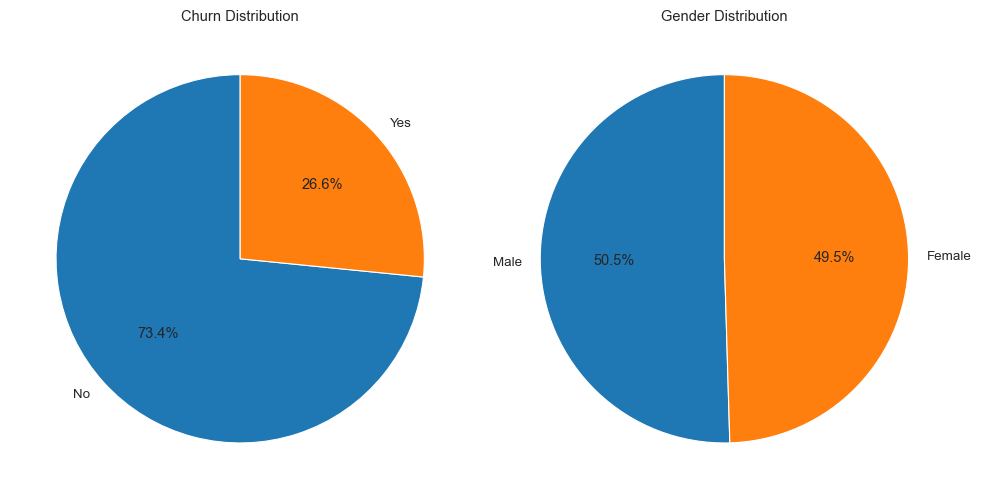

In [48]:
plt.figure(figsize=(10, 5))
# Churn Distribution
plt.subplot(1, 2, 1)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')

# Gender Distribution
plt.subplot(1, 2, 2)
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

- The Churn column is umbalanced, with a significantly higher number of customers who did not churn compared to those who did. This imbalance can affect the performance of machine learning models, so it may be necessary to use techniques such as oversampling, undersampling, or using algorithms that can handle imbalanced datasets.

- The Gender distribution is balanced

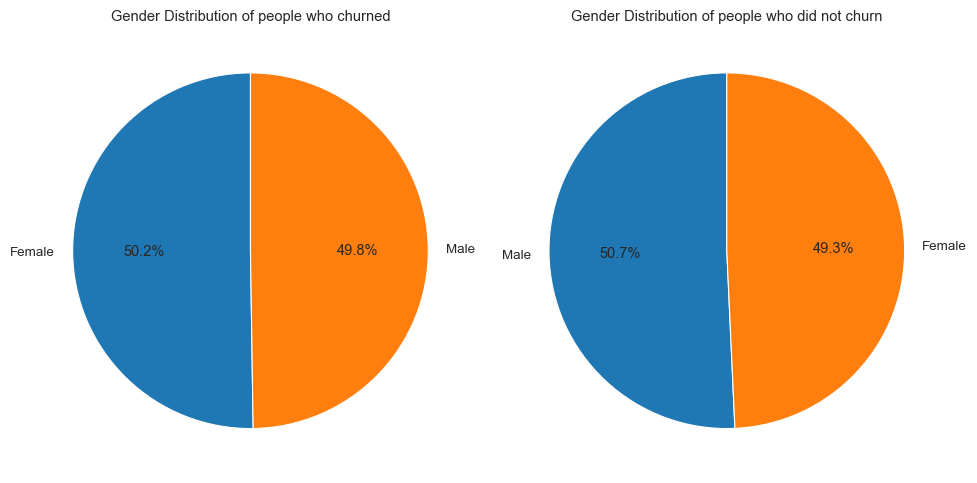

In [49]:
df_churn_yes = df[df['Churn'] == 'Yes']
df_churn_no = df[df['Churn'] == 'No']

plt.figure(figsize=(10, 5))
# Churn Distribution
plt.subplot(1, 2, 1)
gender_counts = df_churn_yes['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of people who churned')

# Gender Distribution
plt.subplot(1, 2, 2)
gender_counts = df_churn_no['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of people who did not churn')

plt.tight_layout()
plt.show()

It can be seen that the gender is not a significant factor in customer churn, as the churn rates are similar.

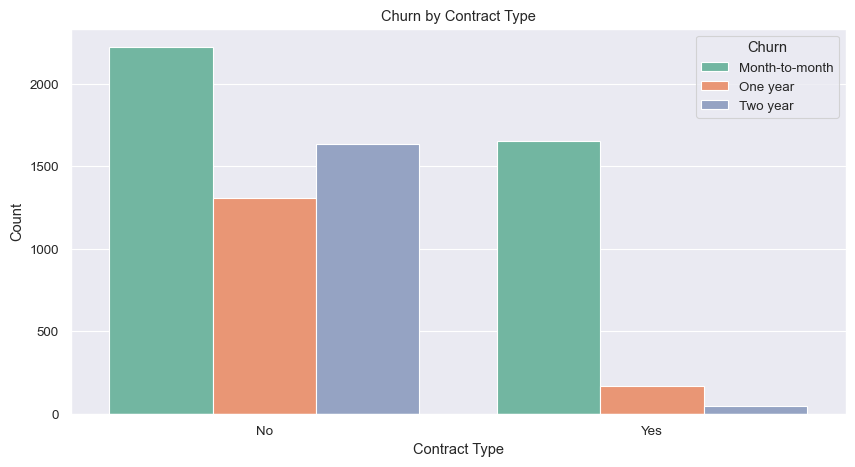

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', hue='Contract', data=df, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

The contract type has a significant impact on customer churn, with month-to-month contracts having the highest churn rate, while two-year contracts have the lowest churn rate. It seems that the company need to focus on retaining customers with month-to-month contracts, as they are more likely to churn.

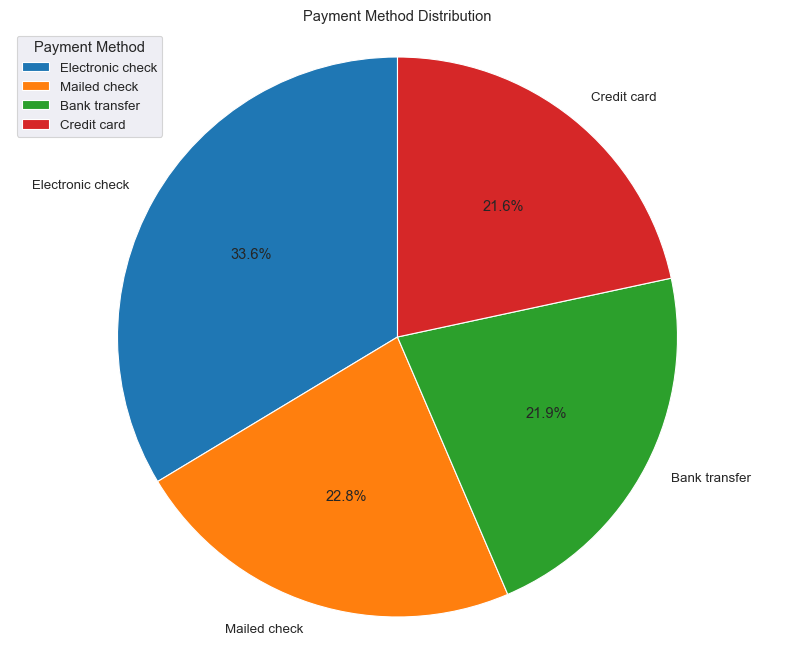

In [51]:
plt.figure(figsize=(10, 8))
plt.pie(df['PaymentMethod'].value_counts(), labels=['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')
plt.legend(title='Payment Method')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

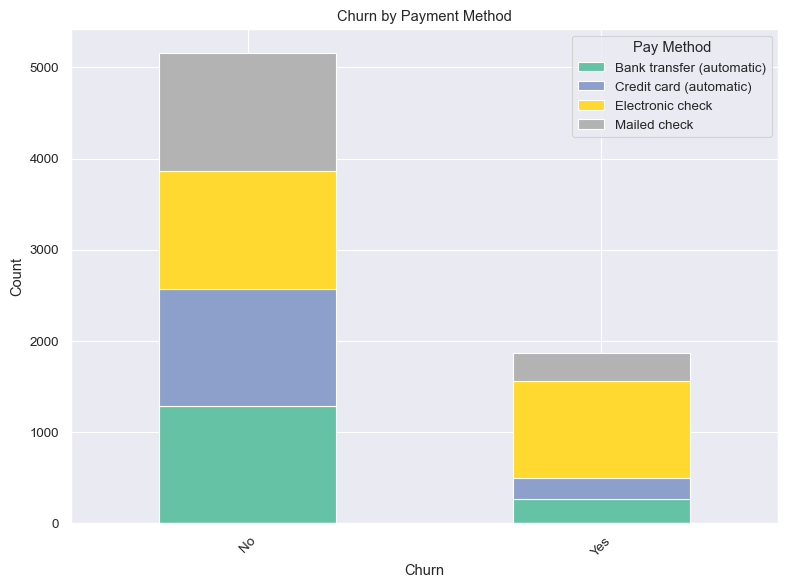

In [52]:
grouped = df.groupby(['Churn','PaymentMethod']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.title('Churn by Payment Method')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Pay Method', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

While the pay method is really similar for non-churned customers, the churned customers have a higher percentage of electronic check payments. This suggests that the company may need to improve its payment processing for electronic checks to reduce churn.

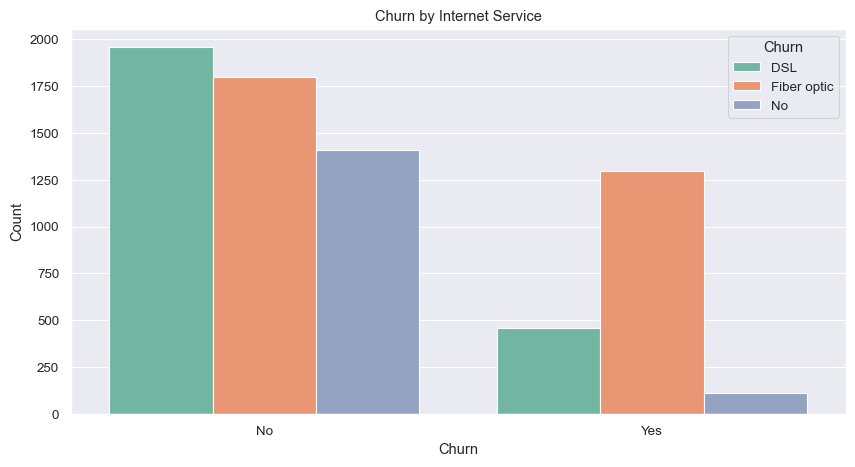

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', hue='InternetService', data=df, palette='Set2')
plt.title('Churn by Internet Service')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

People  who churned have a higher percentage of Fiber optic internet service compared to those who did not churn. This suggests that customers with Fiber optic service may be more likely to leave the company.

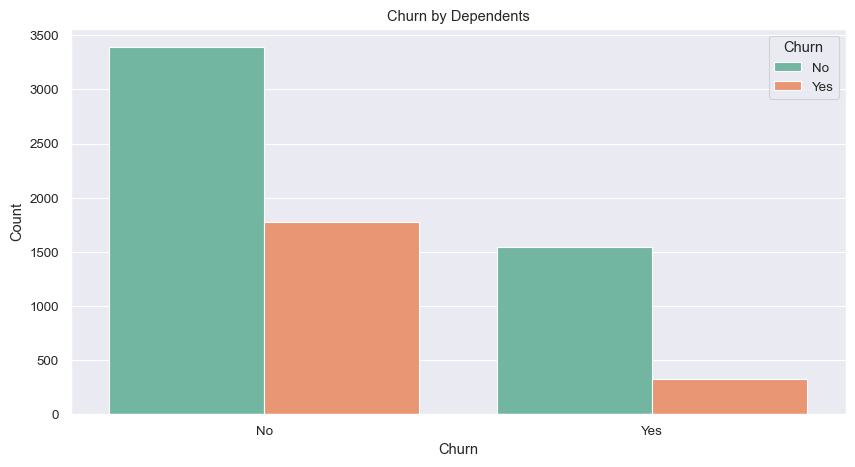

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', hue='Dependents', data=df, palette='Set2')
plt.title('Churn by Dependents')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

People with dependents tend to churn more than those without dependents.

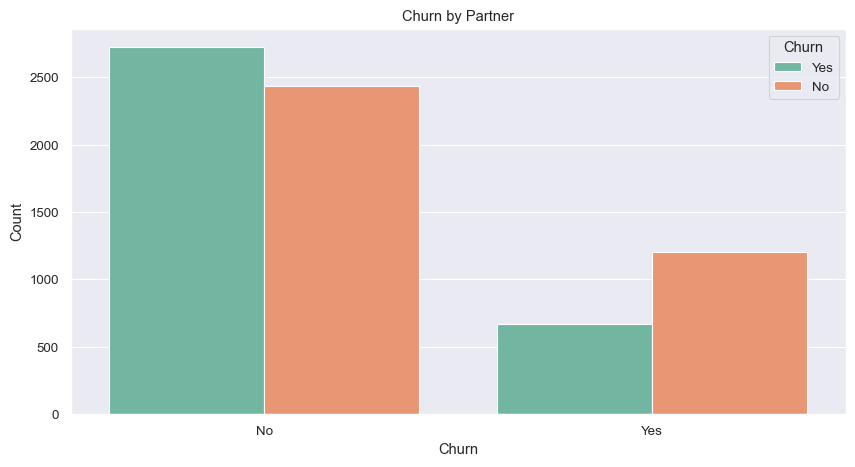

In [55]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', hue='Partner', data=df, palette='Set2')
plt.title('Churn by Partner')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

People who don't have partners tend to churn more than those who have partners.

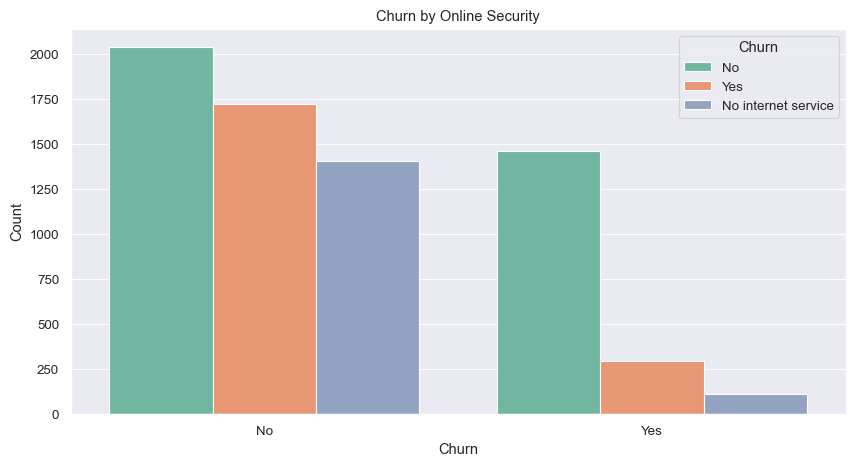

In [56]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', hue='OnlineSecurity', data=df, palette='Set2')
plt.title('Churn by Online Security')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

Most customers who don't have Online Security tend to churn more than those who have Online Security.

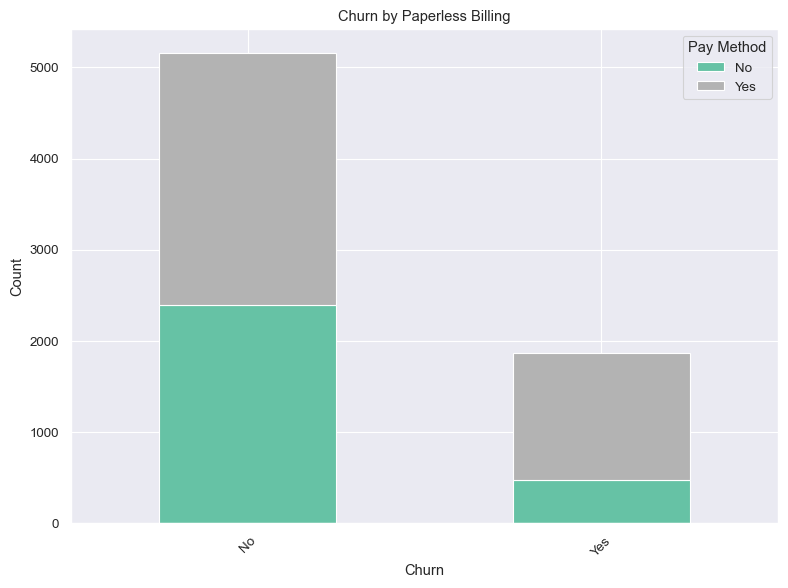

In [57]:
grouped = df.groupby(['Churn','PaperlessBilling']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.title('Churn by Paperless Billing')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Pay Method', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Curstomer with Paperless Billing are more likely to churn than those without it.

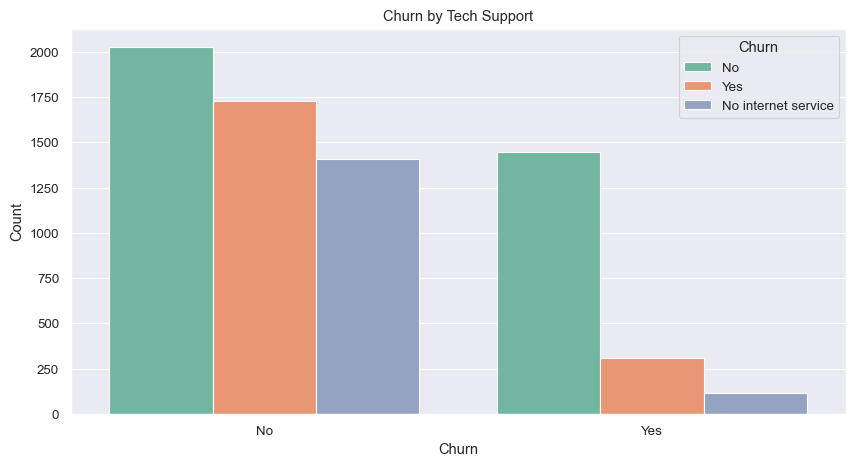

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', hue='TechSupport', data=df, palette='Set2')
plt.title('Churn by Tech Support')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

Customers with Tech Support tend to churn less than those without it.

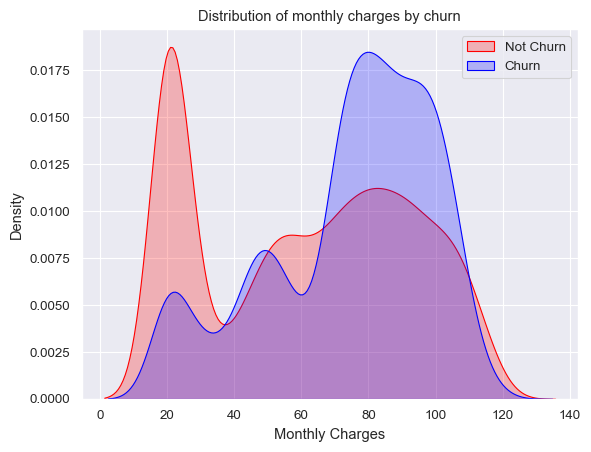

In [59]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers with higher Monthly Charges are also more likely to churn.

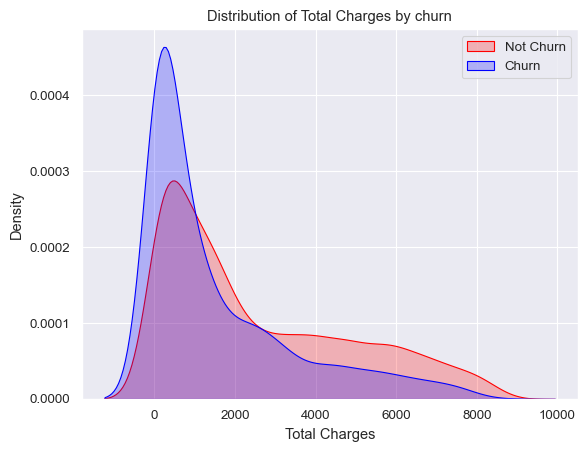

In [60]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of Total Charges by churn');

Also, customers with a higher Total Charges are more likely to churn, which is counterintuitive. This could indicate that customers who have been with the company longer and have accumulated higher charges are more likely to leave, possibly due to dissatisfaction with the service or pricing.

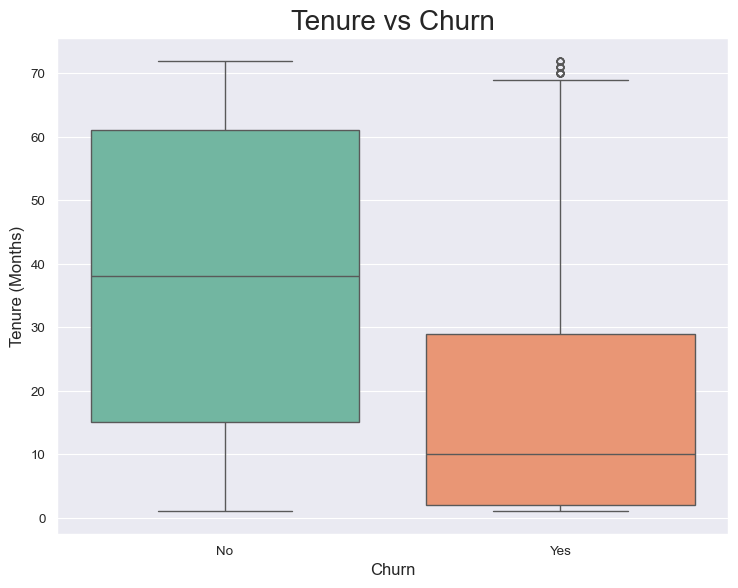

In [61]:
plt.figure(figsize=(7.5, 6))

sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2')
plt.title('Tenure vs Churn',fontsize=20)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)

plt.tight_layout()
plt.show()

Customers that stay longer with the company tend to churn less than those who stay for a shorter period of time. This suggests that the company should focus on retaining customers for longer periods of time, as they are less likely to churn.

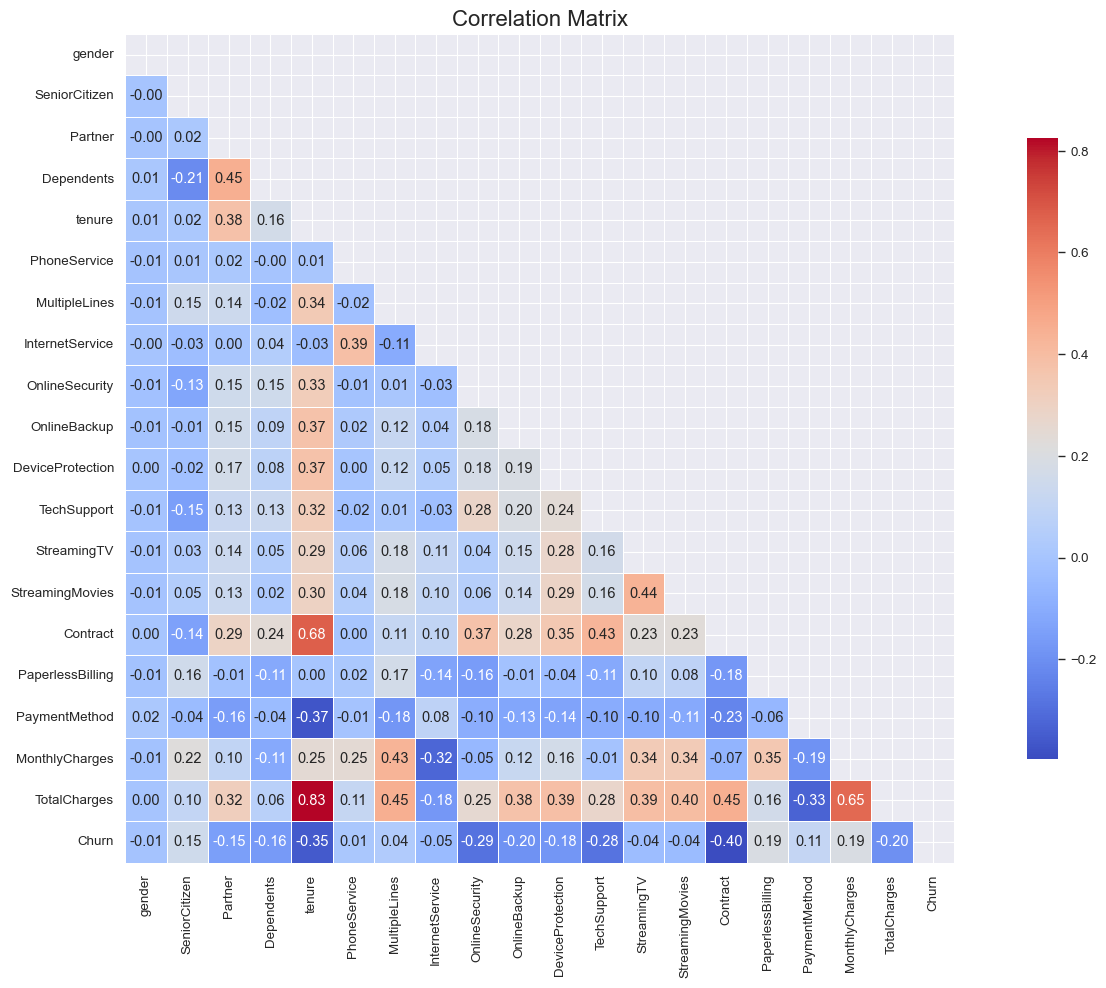

In [62]:
df_corr = df.copy()

for col in df_corr.select_dtypes(include=['object', 'category']).columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

corr_matrix = df_corr.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            mask=mask, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.2f',
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": .75}
            )

plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Ax Functions

In [63]:
def label_encode_dataframe(df, verbose=True):
    df_encoded = df.copy(deep=True)
    encoders = {}
    
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    if verbose:
        print('Label Encoder Transformation')

    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        encoders[col] = le
        
        if verbose:
            print(f"{col} : {df_encoded[col].unique()} = {le.inverse_transform(df_encoded[col].unique())}")
    
    return df_encoded, encoders


In [64]:
def displot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title(f"Density Plot for {feature}")
    sns.histplot(frame[feature], kde=True, stat='density', color=color)
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

In [65]:
df, encoders = label_encode_dataframe(df)

Label Encoder Transformation
gender : [0 1] = ['Female' 'Male']
SeniorCitizen : [0 1] = ['No' 'Yes']
Partner : [1 0] = ['Yes' 'No']
Dependents : [0 1] = ['No' 'Yes']
PhoneService : [0 1] = ['No' 'Yes']
MultipleLines : [1 0 2] = ['No phone service' 'No' 'Yes']
InternetService : [0 1 2] = ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 2 1] = ['No' 'Yes' 'No internet service']
OnlineBackup : [2 0 1] = ['Yes' 'No' 'No internet service']
DeviceProtection : [0 2 1] = ['No' 'Yes' 'No internet service']
TechSupport : [0 2 1] = ['No' 'Yes' 'No internet service']
StreamingTV : [0 2 1] = ['No' 'Yes' 'No internet service']
StreamingMovies : [0 2 1] = ['No' 'Yes' 'No internet service']
Contract : [0 1 2] = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0] = ['Yes' 'No']
PaymentMethod : [2 3 0 1] = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : [0 1] = ['No' 'Yes']


In this case, we are making only two main changes.
- The first one is applying a LabelEncoder. I decided to use this type of encoding because XGBoost and LightGBM, the models we are going to use,handle this encoding method very well.
- The second change addresses the class imbalance in our dataset. I will use SMOTE to balance the "churn" and "not churn" classes in our model.

In [66]:
df_important_feat = df.copy()
df_important_feat.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)

In [67]:
X = df_important_feat.drop(columns=['Churn']).copy()
y = df_important_feat['Churn'].copy()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [69]:
resampler = SMOTE(random_state=42, sampling_strategy=1)
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)


## Machine Learning

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import RocCurveDisplay


def model(classifier, x_train, y_train, x_test, y_test):

    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_score = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    print("Cross Validation Score :", '{0:.2%}'.format(cv_score))
    roc_auc = roc_auc_score(y_test, prediction)
    print("ROC_AUC Score :", '{0:.2%}'.format(roc_auc))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### LightGBM

In [ ]:
lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000, verbose=-1)

Cross Validation Score : 91.23%
ROC_AUC Score : 74.25%


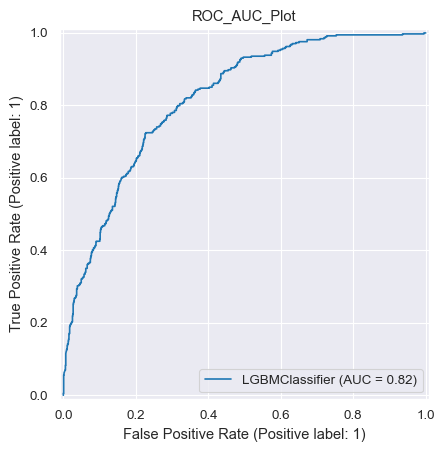

In [89]:
model(lgbm,X_train_resampled,y_train_resampled,X_test,y_test)

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1033
           1       0.53      0.71      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407



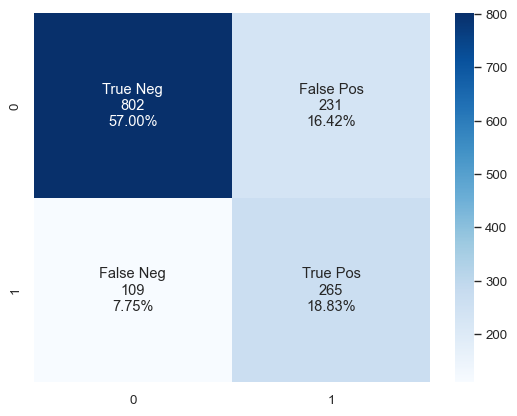

In [90]:
model_evaluation(lgbm,X_test,y_test)

In [91]:
y_proba = lgbm.predict_proba(X_test)[:, 1]
threshold = 0.40
y_pred = (y_proba > threshold).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.77      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407



### XGBoost

In [92]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score : 91.18%
ROC_AUC Score : 74.30%


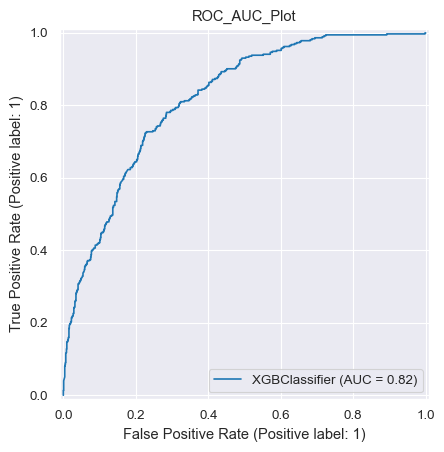

In [93]:
model(classifier_xgb,X_train_resampled,y_train_resampled,X_test,y_test)

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1033
           1       0.54      0.71      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407



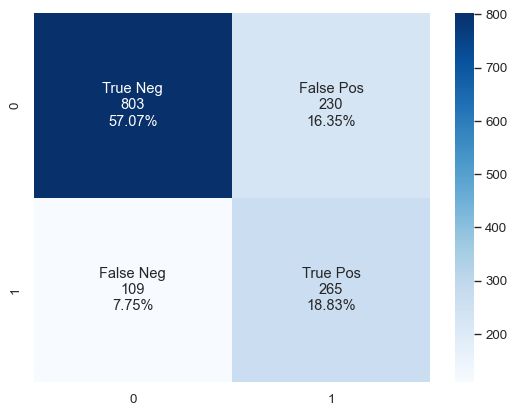

In [94]:
model_evaluation(classifier_xgb,X_test,y_test)

In [95]:
y_proba = classifier_xgb.predict_proba(X_test)[:, 1]
threshold = 0.40
y_pred = (y_proba > threshold).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.50      0.77      0.60       374

    accuracy                           0.73      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407



### Stacking

In [96]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import recall_score, precision_score

stack = StackingClassifier(
    estimators=[
        ('xgb', classifier_xgb),
        ('gb', lgbm)
    ],
    final_estimator=LogisticRegression()
)

stack.fit(X_train_resampled, y_train_resampled)
y_pred = stack.predict(X_test)
print(classification_report(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1033
           1       0.53      0.70      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407

0.7005347593582888
0.5346938775510204


## Evaluation

In [97]:
import shap

model = lgbm
explainer = shap.Explainer(model, X_train_resampled, feature_names=X_train_resampled.columns)
shap_values = explainer(X_test)

 99%|===================| 1392/1407 [00:13<00:00]        

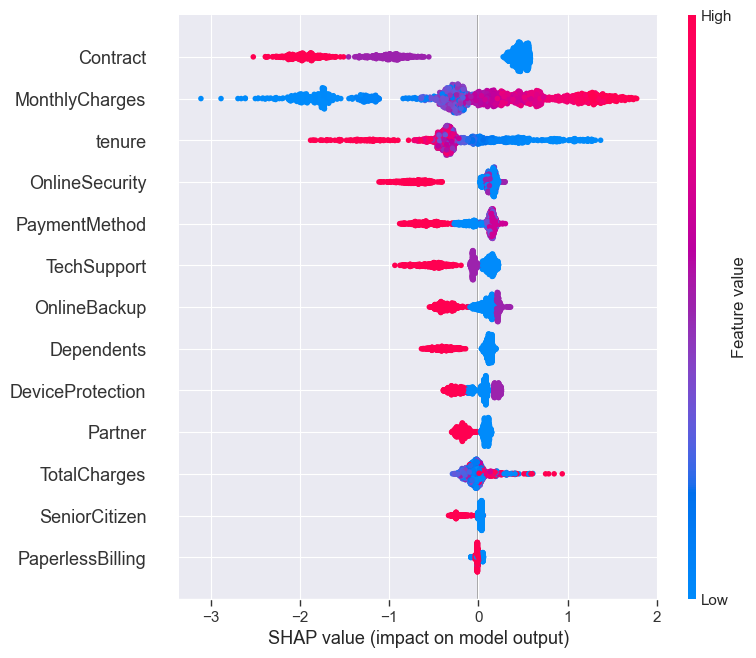

In [98]:
shap.summary_plot(shap_values, X_test)

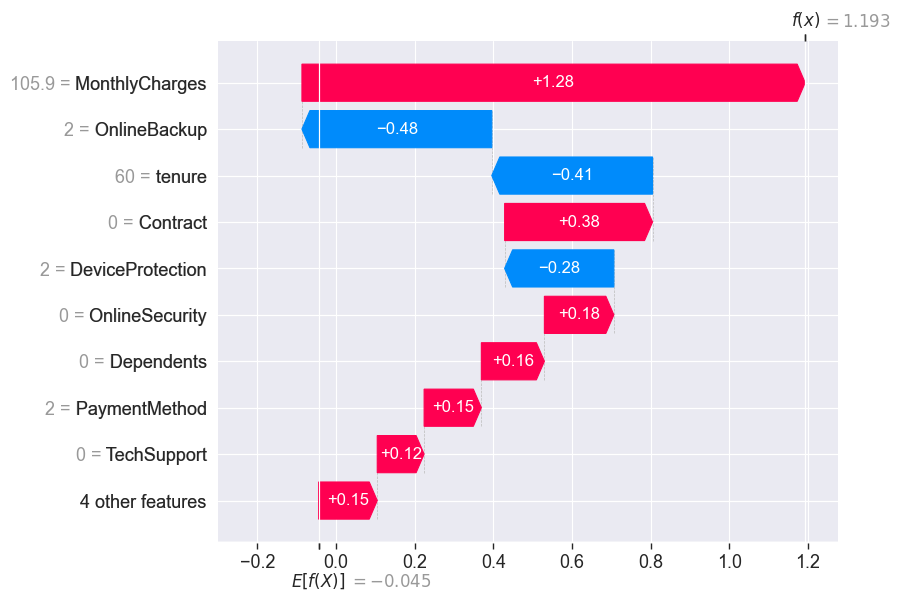

In [99]:
# Para el cliente en la fila 5
shap.plots.waterfall(shap_values[5])

In [83]:
model = classifier_xgb
explainer = shap.Explainer(model, X_train_resampled, feature_names=X_train_resampled.columns)
shap_values = explainer(X_test)

 92%|==================  | 1297/1407 [00:12<00:01]       

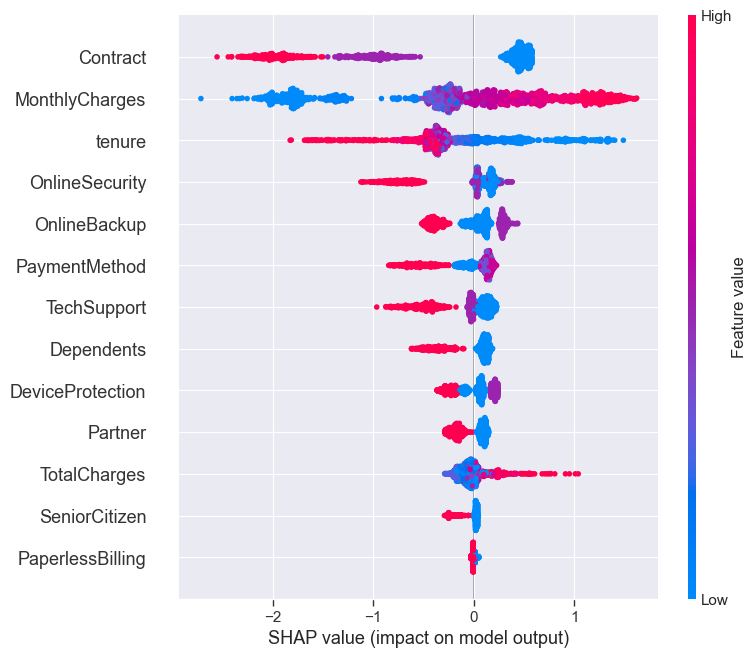

In [84]:
shap.summary_plot(shap_values, X_test)

## Conclusions

The model demonstrates strong overall performance, particularly in identifying churned customers, which is critical for this task. Below are the key takeaways:

1. Churn Detection (Class 1):

    - Recall of 0.70 indicates the model correctly identifies 70% of customers who churn.

    - Precision of 0.54 suggests that some false positives exist, but it’s acceptable given the high recall.

    - F1-score of 0.61 reflects a balanced trade-off between precision and recall.

2. Non-Churn Detection (Class 0):

    - The model performs very well with high precision (0.88) and recall (0.79) for customers who do not churn.

3. Overall Accuracy:

    - The model achieves a 76% accuracy, which is reasonable, though accuracy is not the most relevant metric in imbalanced classification.

4. Macro and Weighted Averages:

    - The macro F1-score of 0.72 shows decent balance across both classes.

    - The weighted average F1-score of 0.77 confirms good overall performance, adjusted for class support.

The model prioritizes recall for churned customers, which is appropriate in churn prediction, where missing potential churns is costlier than having a few false alarms. There is still room to improve precision for the churn class, but the model already offers actionable and reliable predictions for business use.

Let me know if you want this in a more academic tone or as a bullet point executive summary.